In [1]:
import keras

Using Theano backend.


In [2]:
from keras.models import Sequential
from keras.layers import Dense

In [3]:
import numpy as np
import random
np.random.seed(42)
random.seed(123)
from matplotlib import pyplot as plt
from sklearn.utils import shuffle

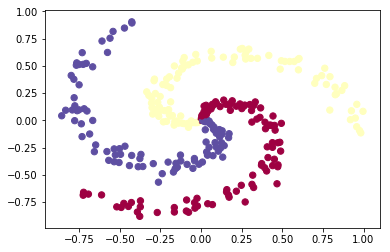

In [4]:
# generate data
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in xrange(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
# lets visualize the data:
X, y = shuffle(X, y)
y_one_hot = np.eye(K)[y]
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [5]:
input_shape = (2,)
model = Sequential()
model.add(Dense(20, activation='sigmoid', input_shape=input_shape))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.SGD(lr=1), metrics=['accuracy'])

In [6]:
model.fit(X, y_one_hot, batch_size=100, epochs=1000, verbose=1)

Epoch 1/1000
300/300 [==============================] - 0s - loss: 1.1532 - acc: 0.4133     
Epoch 2/1000
300/300 [==============================] - 0s - loss: 1.1196 - acc: 0.3467     
Epoch 3/1000
300/300 [==============================] - 0s - loss: 1.1790 - acc: 0.3467     
Epoch 4/1000
300/300 [==============================] - 0s - loss: 1.0904 - acc: 0.4133     
Epoch 5/1000
300/300 [==============================] - 0s - loss: 1.0779 - acc: 0.3900     
Epoch 6/1000
300/300 [==============================] - 0s - loss: 1.1336 - acc: 0.4133     
Epoch 7/1000
300/300 [==============================] - 0s - loss: 1.0271 - acc: 0.4500     
Epoch 8/1000
300/300 [==============================] - 0s - loss: 1.0959 - acc: 0.4033     
Epoch 9/1000
300/300 [==============================] - 0s - loss: 0.9541 - acc: 0.5967     
Epoch 10/1000
300/300 [==============================] - 0s - loss: 0.9336 - acc: 0.5833     
Epoch 11/1000
300/300 [==============================] - 0s - loss: 1

In [7]:
weights2 = model.layers[-1].get_weights()
weights1 = model.layers[-2].get_weights()

In [8]:
W1 = weights1[0]
b1 = weights1[1].reshape(20, 1)
W2 = weights2[0]
b2 = weights2[1].reshape(3, 1)

In [9]:
def plot_decision_boundary(X, y, W1, b1, W2, b2):
    # plot the resulting classifier
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = np.dot(sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], W1) + b1), W2) + b2
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

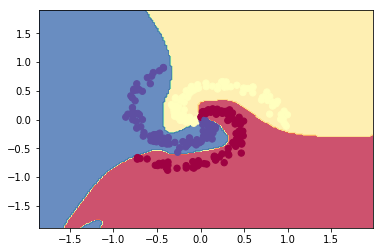

In [10]:
b1 = b1.T
b2 = b2.T
def sigmoid(x):
    return 1/(1 + np.exp(-x))
plot_decision_boundary(X, y, W1, b1, W2, b2)